In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import classification_report
iris = datasets.load_iris()
%matplotlib inline
# print(iris.keys())
# print('data: ',iris['data'])
# print('target: ',iris['target'])
# print('target_names: ', iris['target_names'])
# print('DESCR: ',iris['DESCR'])
# print('feature_names: ',iris['feature_names'])
# print('filename: ',iris['filename'])

#Jest to baza z danymi zaierająca 150 rekordów opisujących kielichy i płatki kwiatów dla trzech różnych
#gatunków irysów po 50 sztuk każdy.

[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777]


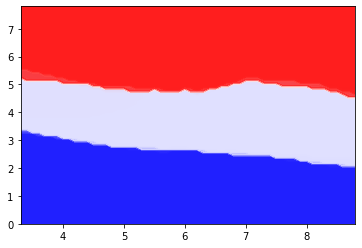

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


#Lista wartości dla parametru
listOfParameters = [1, 2, 3, 4, 5, 6, 7]
listOfAccuracies = []
x = iris.data
y = iris.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)
%matplotlib inline

#pętla dla wykonująca polecenie dla każdego elementu w liście
for element in listOfParameters:
    # Tworzymy klasyfikator k-NN używając parametru
    knn = KNeighborsClassifier(n_neighbors = element)
    # Uczymy klasyfikator na zbiorze - zaskoczenie - uczącym
    knn.fit(xTrain, yTrain)
    # Przewidujemy wartości dla zbioru testowego
    y_pred = knn.predict(xTest)
    # Dodawanie kolejnej wartości dokładności klasyfikatora do listy
    listOfAccuracies.append(knn.score(xTest, yTest))
    # Tworzymy płaszczyznę wszystkich możliwych wartości dla cechy 0 oraz 2, z krokiem 0.1
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 2].min() - 1, x[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    # Uczymy klasyfikator na tylko dwóch wybranych cechach
    knn.fit(xTrain[:, [0, 2]], yTrain)
    # Przewidujemy każdy punkt na płaszczyźnie
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    # Tworzymy contourplot
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.bwr)
    #plt.scatter(x[:, 0], x[:, 2], c=y, s=20, edgecolor='k')
    #plt.show()
print(listOfAccuracies)    

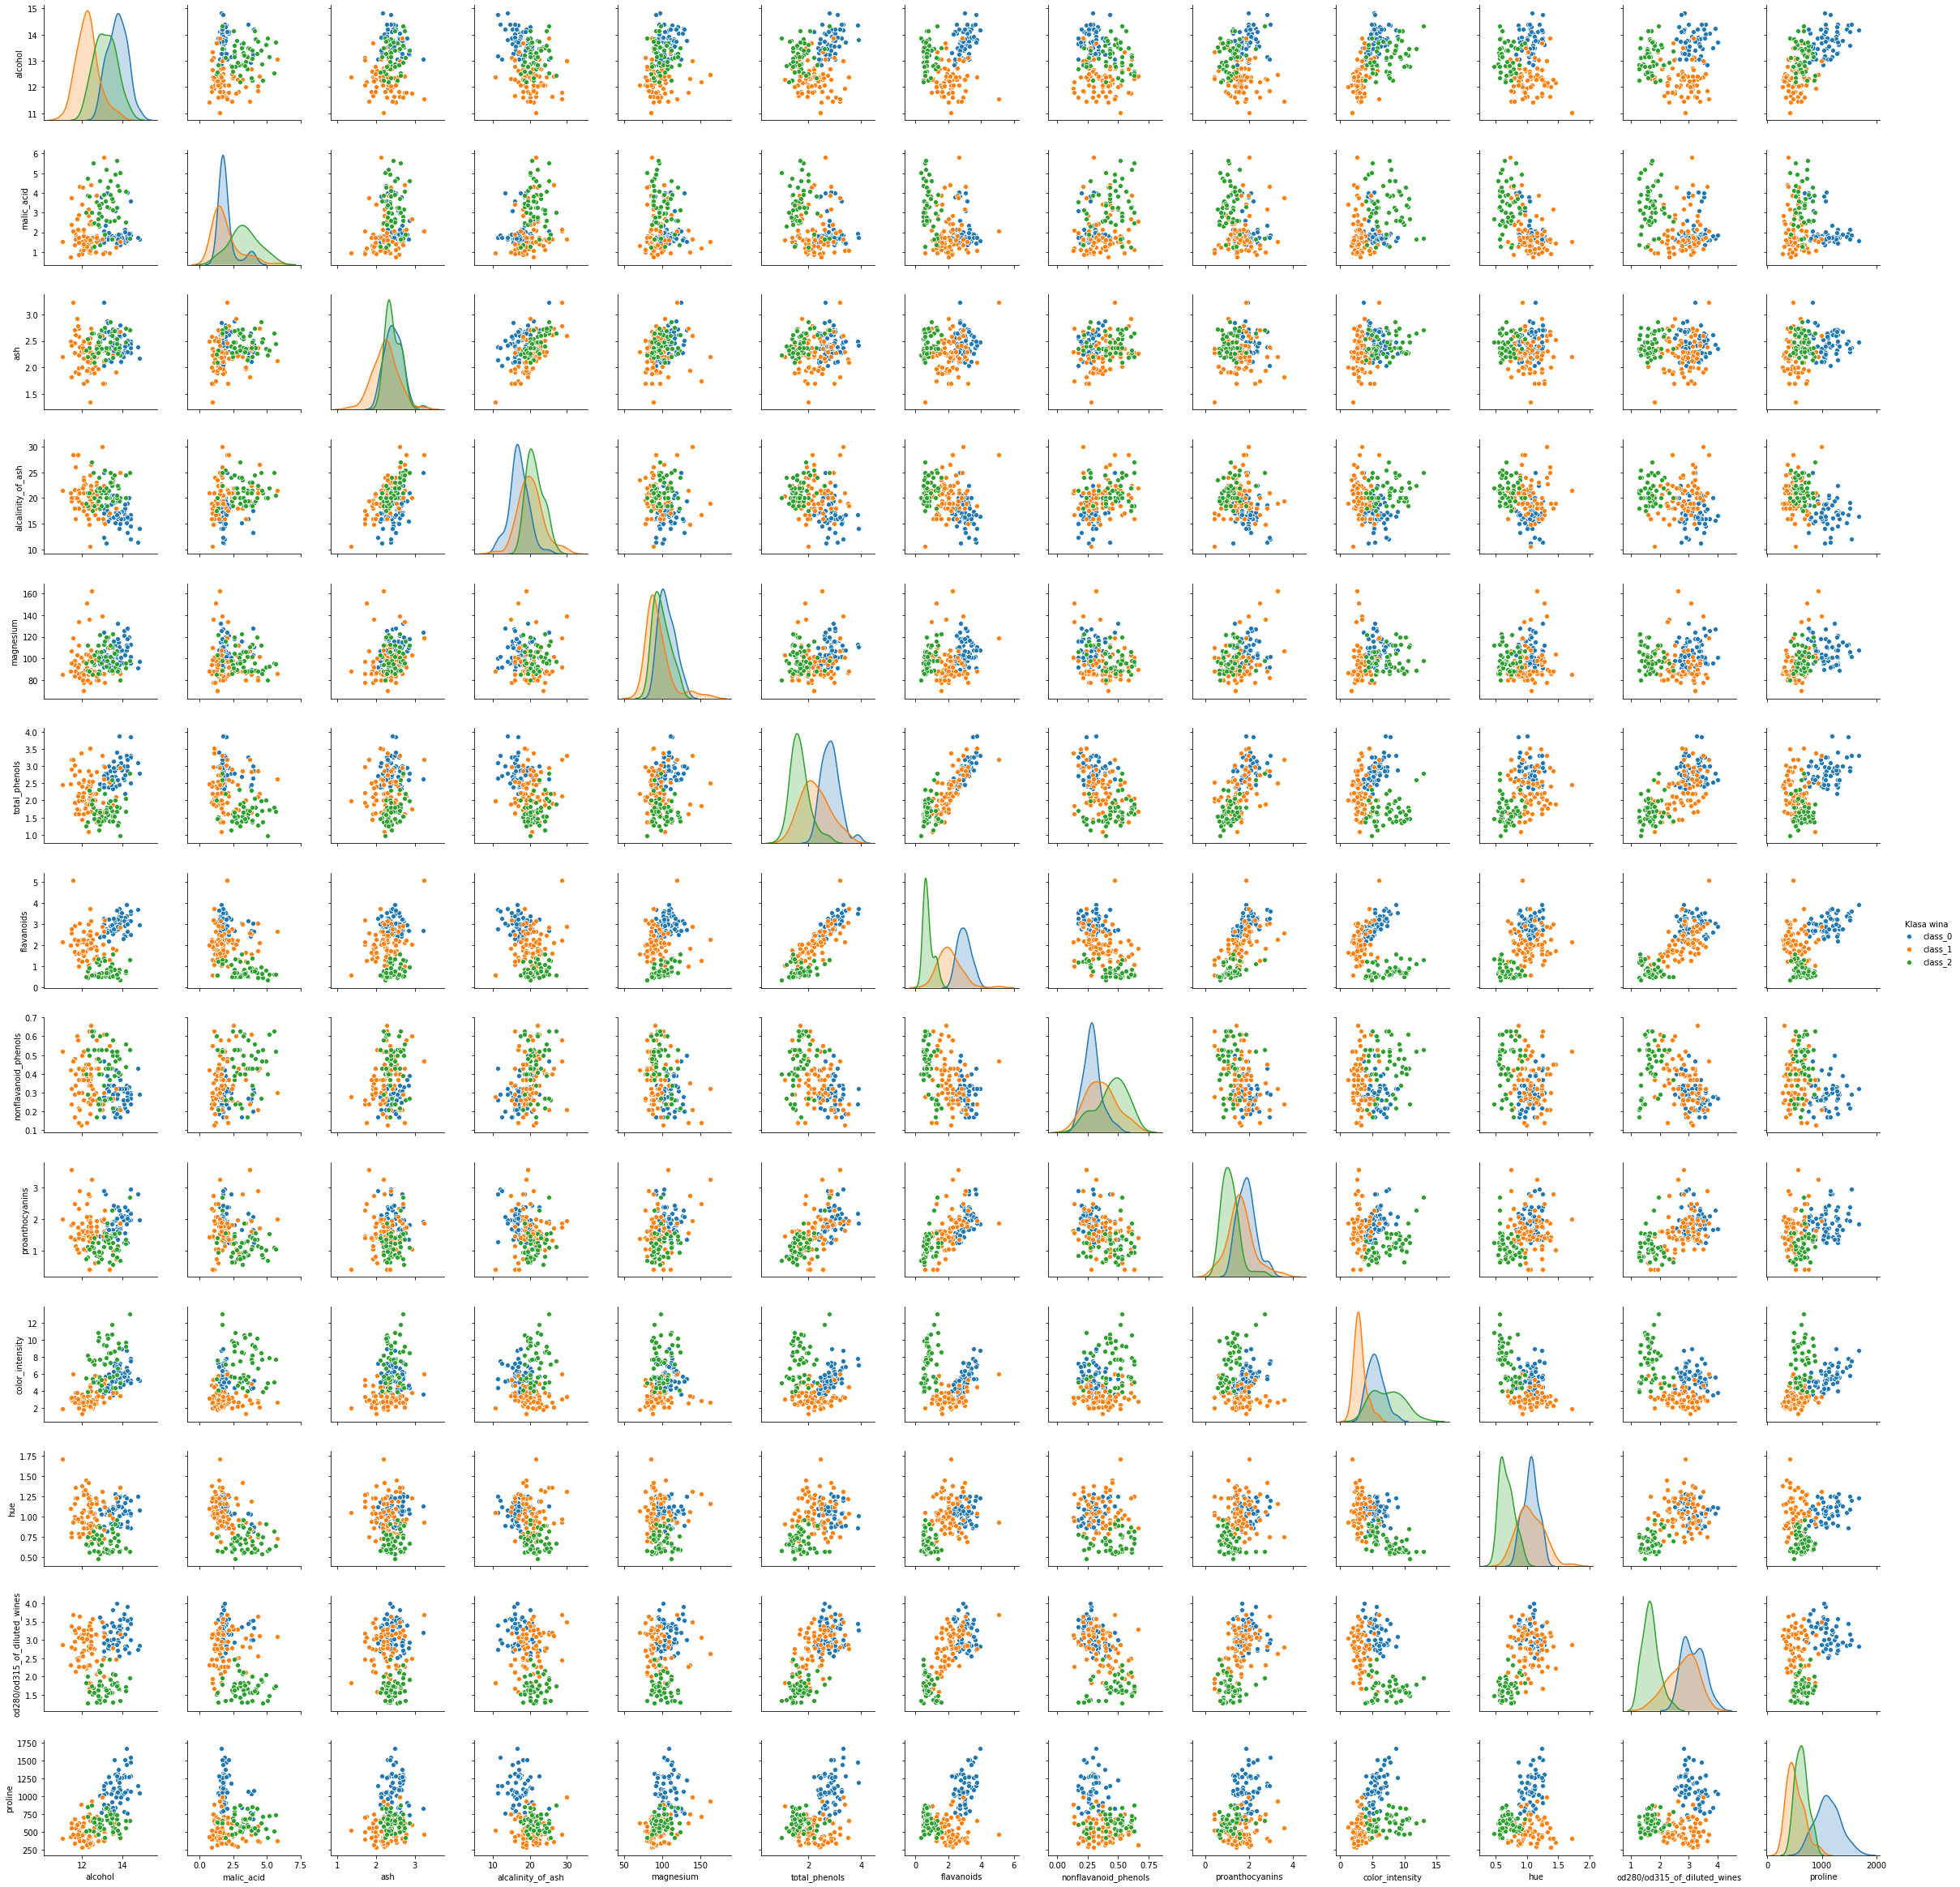

In [21]:
from sklearn.datasets import load_wine

wine = load_wine()

# konwersja na obiekt pandas.DataFrame
wineDf = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# funkcja która nam zamieni wartości od 0 do 11 na pełny opis tekstowy dla klasy wina
targets = map(lambda x: wine['target_names'][x], wine['target'] )
# doklejenie informacji o gatunku do reszty dataframe
wineDf['Klasa wina'] = np.array(list(targets))

# wykres
sns.pairplot(wineDf, hue='Klasa wina')
#plt.show()

In [53]:
# Podzielmy zbiór na cechy oraz etykiety
x = wine.data
y = wine.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)
print()
# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze uczącym
knn.fit(xTrain, yTrain)

# Sprawdzamy dokładność klasyfikatora
print(knn.score(xTest, yTest))

# Klasyfikatory potrafią określać również prawdopodobieństwo przynależności do konkretnej klasy
yPred = knn.predict(xTest)
# Sprawdźmy wyniki klasyfikacji
print(yPred)


0.6666666666666666
[0 0 1 1 0 1 0 1 2 2 1 1 0 0 1 0 2 0 2 0 0 0 1 0 2 0 2 1 1 0 0 1 2 0 1 2 0
 0 0 1 2 1 1 0 1 0 1 0 0 0 0 1 0 1]


In [55]:
#O ile rozumię to jest tu podawana lista obiektów które porównujemy do naszego "wzorca" i wyliczana jest dokładność?
from sklearn.metrics import classification_report
a = [2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1]
from sklearn.metrics import confusion_matrix
print(classification_report(a, yPred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(a,yPred))

              precision    recall  f1-score   support

           0       0.27      0.39      0.32        18
           1       0.32      0.27      0.29        22
           2       0.11      0.07      0.09        14

    accuracy                           0.26        54
   macro avg       0.23      0.24      0.23        54
weighted avg       0.25      0.26      0.25        54

[[ 7  7  4]
 [12  6  4]
 [ 7  6  1]]
